## Exploratory Analysis Contents<a id='Contents'></a>
* [Importing Excel Files to DataFrame](#Importing_Excel_Files_to_DataFrame)
* [Categorical Features in Detail](#Categorical_Features_in_Detail)
  * [Gender](#Gender)
  * [Senior Citizen](#Senior_Citizen)
  * [Partner](#Partner)
  * [Dependents](#Dependents)
  * [Phone Service](#Phone_Service)
  * [Multiple Lines](#Multiple_Lines)
  * [Internet Service](#Internet_Service)
  * [Online Security](#Online_Security)
  * [Online Backup](#Online_Backup)
  * [Device Protection](#Device_Protection)
  * [Tech Support](#Tech_Support)
  * [Streaming TV](#Streaming_TV)
  * [Streaming Movies](#Streaming_Movies)
  * [Paperless Billing](#Paperless_Billing)
  * [Payment Method](#Payment_Method)
* [Numerical Features](#Numerical_Features)
  * [Tenure Months](#Tenure_Months)
  * [Charges](#Charges)
* [Showing Churn rates in Different Cities using Tableau](#Showing_Churn_rates_in_Different_Cities_using_Tableau)
  * [Customer Lifetime Value](#Customer_Lifetime_Value)


In [112]:
#Importing necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Importing Excel Files to DataFrame**<a id='Importing_Excel_Files_to_DataFrame'></a>

In [113]:
df1 = pd.read_excel('.../Data/Telco_customer_churn.xlsx')

In [114]:
#Seeing all the columns
pd.set_option('display.max_columns', None)

In [115]:
df = df1.drop(columns=['Count', 'Country', 'State', 'Lat Long'])

In [116]:
# There were no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Zip Code           7043 non-null   int64  
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

All the features were categorical variables, except for 'Tenure Months', 'Monthly Charges', 'Total charges',  and CLTV

**Categorical Features in Detail**<a id='Categorical_Features_in_Detail'></a>

**Gender**<a id='Gender'></a>

In [117]:
# of the total sample around 18% were senior citizens
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [118]:
# we can do cross tab to examine how churn rates are distributed among gender
ct0 = pd.crosstab(df['Gender'], df['Churn Label'])
print(ct0)

Churn Label    No  Yes
Gender                
Female       2549  939
Male         2625  930


In [119]:
#Creating a dataframe with the churn rates using crosstab results
data = [['Male', (ct0.iloc[1,1]/(ct0.iloc[1,0] + ct0.iloc[1,1])) * 100], ['Female', (ct0.iloc[0,1]/(ct0.iloc[0,0] + ct0.iloc[0,1])) * 100]]
gg0 = pd.DataFrame(data, columns = ['Gender', 'Churn rate'])

In [120]:
# Writing a function to show how churn rates look like in different attributes of features
def twoplots(x, barplotData):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Churn Rates in different attributes of ' + x)
    sns.countplot(ax=axes[0], x=x, data=df, palette='rocket',hue='Churn Label')
    sns.barplot(ax=axes[1], x=x, y='Churn rate', data=barplotData)
    plt.show()

<font color='green'>For each categorical variable in this sample, the countplot on left shows how the feaure makes variation in churn and the plot on right directly compares the churn % in attributes of a feature.

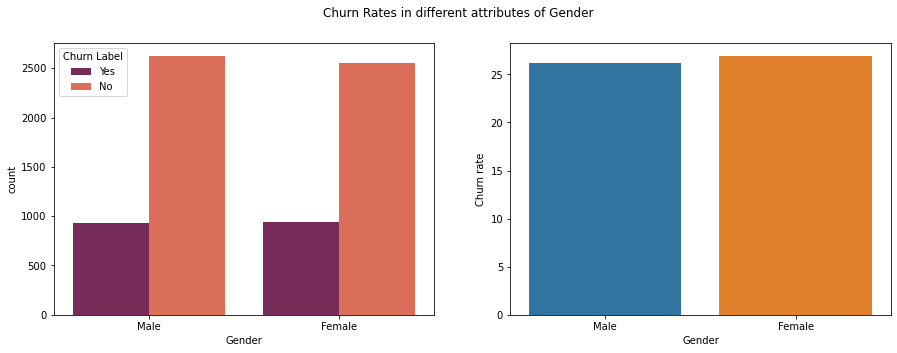

In [121]:
twoplots('Gender', gg0)

<font color='green'>It seems like gender doesn't seem to have any impact on Churn rates.

**Senior Citizen**<a id='Senior_Citizen'></a> 

In [122]:
# of the total sample around 18% were senior citizens
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [125]:
# we can do cross tab to examine how churn rates are distributed among senior citizens
ct = pd.crosstab(df['Senior Citizen'], df['Churn Label'])
print(ct)

Churn Label       No   Yes
Senior Citizen            
No              4508  1393
Yes              666   476


In [126]:
#Creating a dataframe with the churn rates using crosstab results
data = [['Yes', (ct.iloc[1,1]/(ct.iloc[1,0] + ct.iloc[1,1])) * 100], ['No', (ct.iloc[0,1]/(ct.iloc[0,0] + ct.iloc[0,1])) * 100]]
gg = pd.DataFrame(data, columns = ['Senior Citizen', 'Churn rate'])

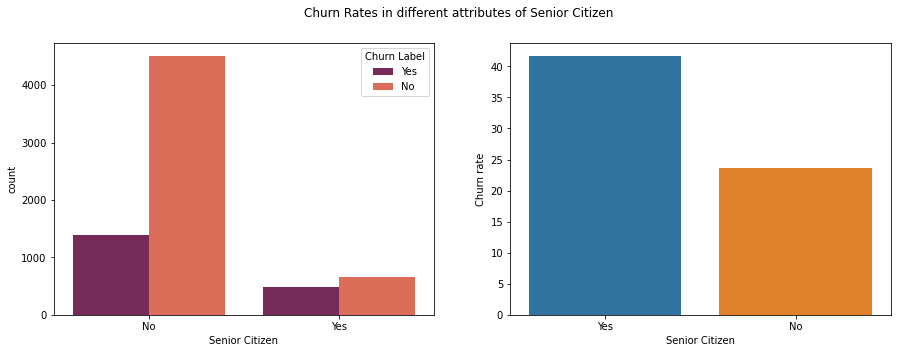

In [127]:
twoplots('Senior Citizen', gg)

<font color='green'>Senior Citizens seem to churn a lot compared to regular customers. This feature can be a predictor.

**2. Partner**<a id='Partner'></a>

In [128]:
# This feature is about if the customer has any partners in his contract with the company
# Around 48% of the customers hold the account with a partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [129]:
ct1 = pd.crosstab(df['Partner'], df['Churn Label'])
print(ct1)

Churn Label    No   Yes
Partner                
No           2441  1200
Yes          2733   669


In [130]:
#Creating a dataframe with the churn rates using crosstab results
data = [['Yes', (ct1.iloc[1,1]/(ct1.iloc[1,0] + ct1.iloc[1,1])) * 100], ['No', (ct1.iloc[0,1]/(ct1.iloc[0,0] + ct1.iloc[0,1])) * 100]]
gg1 = pd.DataFrame(data, columns = ['Partner', 'Churn rate'])

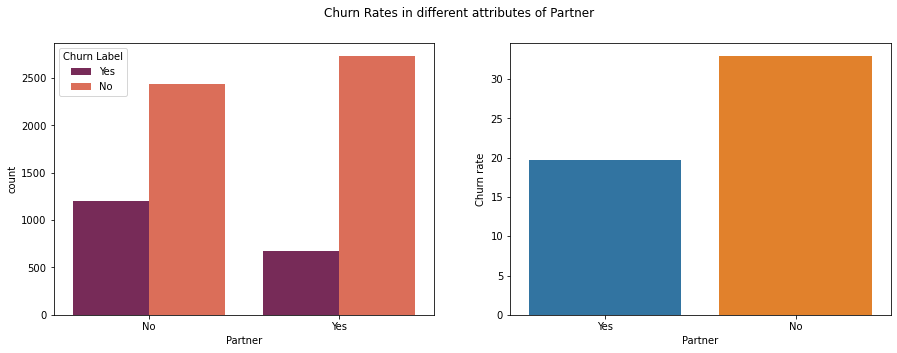

In [131]:
twoplots('Partner', gg1)

<font color='green'>Having a partner in contract makes customers to churn less. Can be used in modeling.

**3. Dependents**<a id='Dependents'></a>

In [132]:
# this variable measures how many dependents a customer has got
print(df['Dependents'].value_counts())


No     5416
Yes    1627
Name: Dependents, dtype: int64


In [133]:
ct2 = pd.crosstab(df['Dependents'], df['Churn Label'])
print(ct2)

data = [['Yes', (ct2.iloc[1,1]/(ct2.iloc[1,0] + ct2.iloc[1,1])) * 100], ['No', (ct2.iloc[0,1]/(ct2.iloc[0,0] + ct2.iloc[0,1])) * 100]]
gg2 = pd.DataFrame(data, columns = ['Dependents', 'Churn rate'])

Churn Label    No   Yes
Dependents             
No           3653  1763
Yes          1521   106


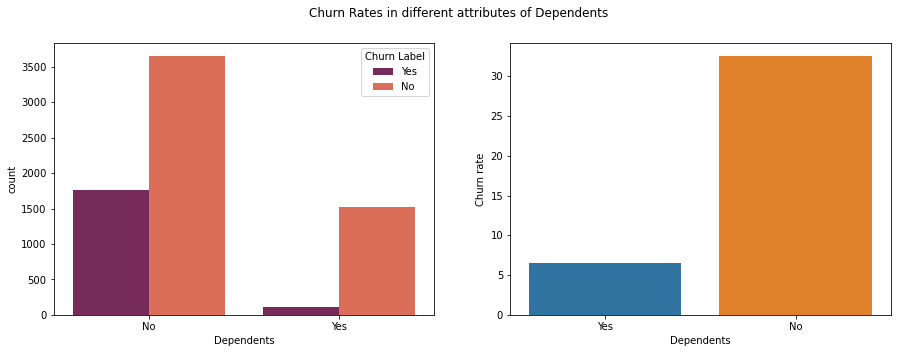

In [134]:
twoplots('Dependents',gg2)

<font color='green'>Those who do not have dependents are more likely (> 4times) to churn than those with dependents.

**4.Phone Service**<a id='Phone_Service'></a>

In [135]:
#This variable measures if Phone service is included in their contract
# Most of them; 90.3% of them have phone service
print(df['Phone Service'].value_counts())

Yes    6361
No      682
Name: Phone Service, dtype: int64


In [136]:
ct3 = pd.crosstab(df['Phone Service'], df['Churn Label'])
print(ct3)

data = [['Yes', (ct3.iloc[1,1]/(ct3.iloc[1,0] + ct3.iloc[1,1])) * 100], ['No', (ct3.iloc[0,1]/(ct3.iloc[0,0] + ct3.iloc[0,1])) * 100]]
gg3 = pd.DataFrame(data, columns = ['Phone Service', 'Churn rate'])

Churn Label      No   Yes
Phone Service            
No              512   170
Yes            4662  1699


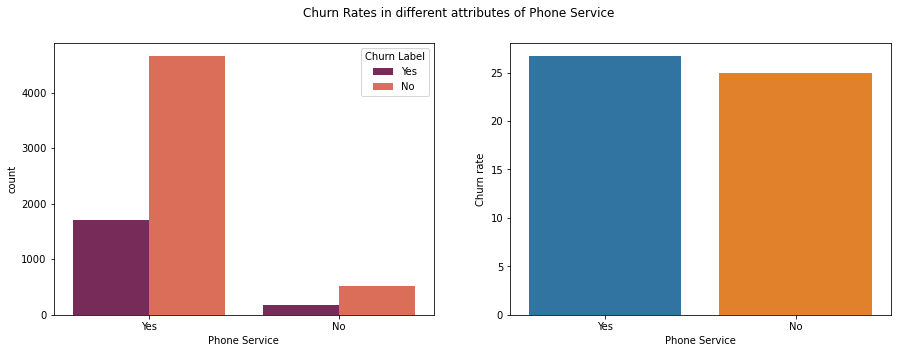

In [137]:
twoplots('Phone Service', gg3)

<font color='green'>Having a phone service in their contract doesn't seem to be related to churn rates.

**5. Multiple Lines**<a id='Multiple_Lines'></a>

In [138]:
print(df['Multiple Lines'].value_counts())


No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64


In [139]:
ct4 = pd.crosstab(df['Multiple Lines'], df['Churn Label'])
print(ct4)
data = [['Yes', (ct4.iloc[2,1]/(ct4.iloc[2,0] + ct4.iloc[2,1])) * 100],
         ['No', (ct4.iloc[0,1]/(ct4.iloc[0,0] + ct4.iloc[0,1])) * 100]]
gg4 = pd.DataFrame(data, columns = ['Multiple Lines', 'Churn rate'])

Churn Label         No  Yes
Multiple Lines             
No                2541  849
No phone service   512  170
Yes               2121  850


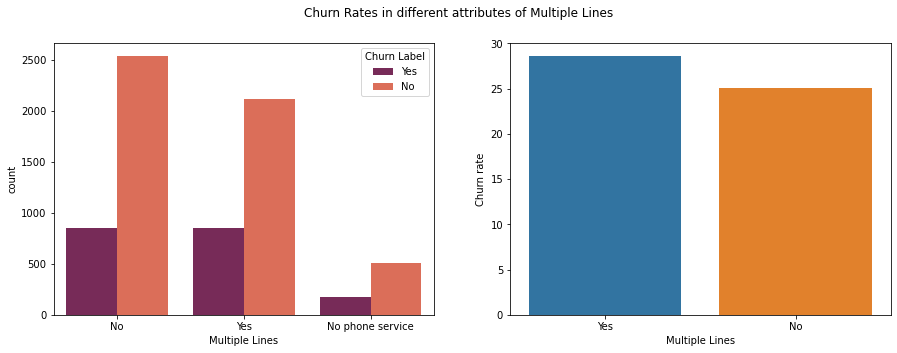

In [140]:
twoplots('Multiple Lines', gg4)

<font color='green'>Having multiple lines is somewhat related to more churning, than single lines (on the right plot, the 'no phone service' has been omitted).

**Internet Service**<a id='Internet_Service'></a>

In [141]:
print(df['Internet Service'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64


In [142]:
ct5 = pd.crosstab(df['Internet Service'], df['Churn Label'])
print(ct5)

data = [['Fiber optic', (ct5.iloc[1,1]/(ct5.iloc[1,0] + ct5.iloc[1,1])) * 100],
         ['DSL', (ct5.iloc[0,1]/(ct5.iloc[0,0] + ct5.iloc[0,1])) * 100]]
gg5 = pd.DataFrame(data, columns = ['Internet Service', 'Churn rate'])


Churn Label         No   Yes
Internet Service            
DSL               1962   459
Fiber optic       1799  1297
No                1413   113


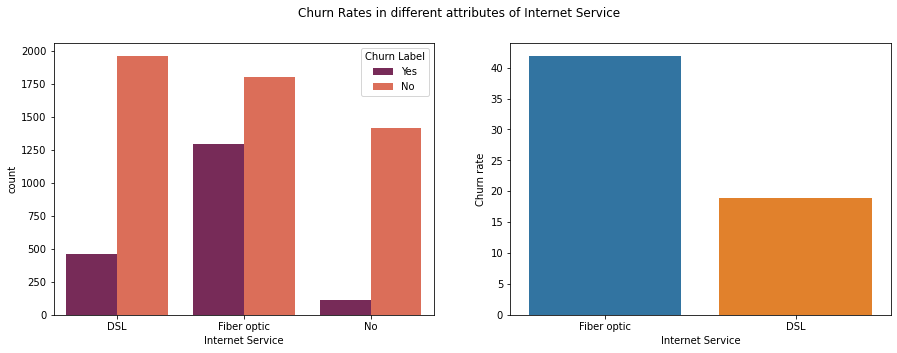

In [143]:
twoplots('Internet Service', gg5)

<font color='green'>People with Fiber optic are > 2 times more likely to churn than those with DSL.



**Contract**<a id='Contract'></a>

In [144]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [145]:
ct6 = pd.crosstab(df['Contract'], df['Churn Label'])
print(ct6)

data = [['Month-to-Month', (ct6.iloc[0,1]/(ct6.iloc[0,0] + ct6.iloc[0,1])) * 100],
         ['One year', (ct6.iloc[1,1]/(ct6.iloc[1,0] + ct6.iloc[1,1])) * 100],
       ['Two year', (ct6.iloc[2,1]/(ct6.iloc[2,0] + ct6.iloc[2,1])) * 100]]
gg6 = pd.DataFrame(data, columns = ['Contract', 'Churn rate'])

Churn Label       No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


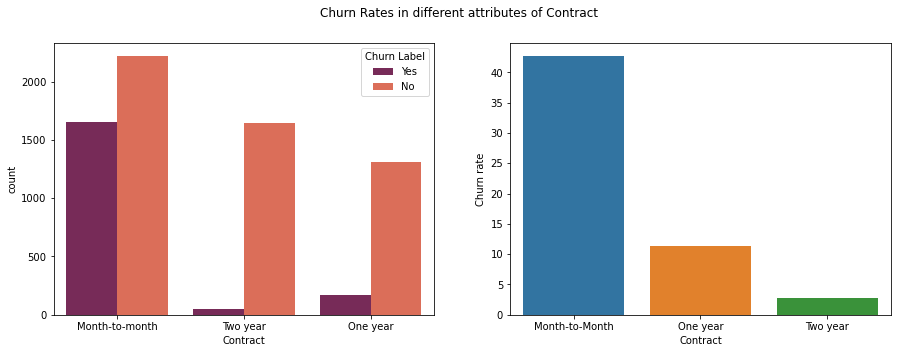

In [146]:
twoplots('Contract', gg6)

<font color='green'>As expected month-to-month contract customers churn much higher than those of one-year and two-year.

**Online Security**<a id='Online_Security'></a>

In [147]:
df['Online Security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64

In [148]:
ct7 = pd.crosstab(df['Online Security'], df['Churn Label'])
print(ct7)

data = [['No', (ct7.iloc[0,1]/(ct7.iloc[0,0] + ct7.iloc[0,1])) * 100],
       ['Yes', (ct7.iloc[2,1]/(ct7.iloc[2,0] + ct7.iloc[2,1])) * 100]]
gg7 = pd.DataFrame(data, columns = ['Online Security', 'Churn rate'])


Churn Label            No   Yes
Online Security                
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


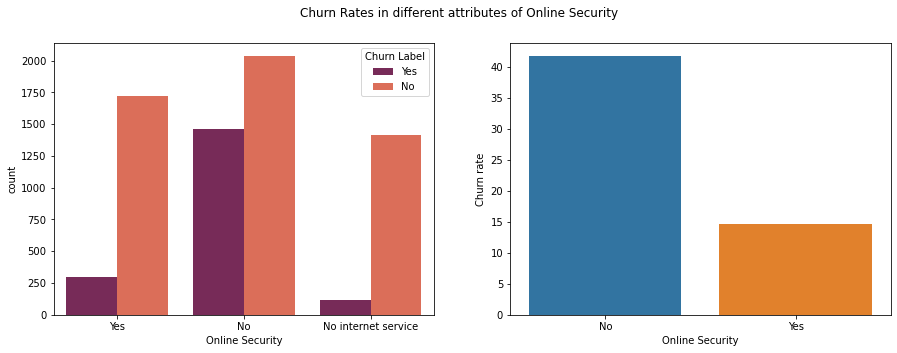

In [149]:
twoplots('Online Security', gg7)

**Online Backup**<a id='Online_Backup'></a>

In [150]:
df['Online Backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64

In [151]:
ct8 = pd.crosstab(df['Online Backup'], df['Churn Label'])
print(ct8)
data = [['No', (ct8.iloc[0,1]/(ct8.iloc[0,0] + ct8.iloc[0,1])) * 100],
       ['Yes', (ct8.iloc[2,1]/(ct8.iloc[2,0] + ct8.iloc[2,1])) * 100]]
gg8 = pd.DataFrame(data, columns = ['Online Backup', 'Churn rate'])


Churn Label            No   Yes
Online Backup                  
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


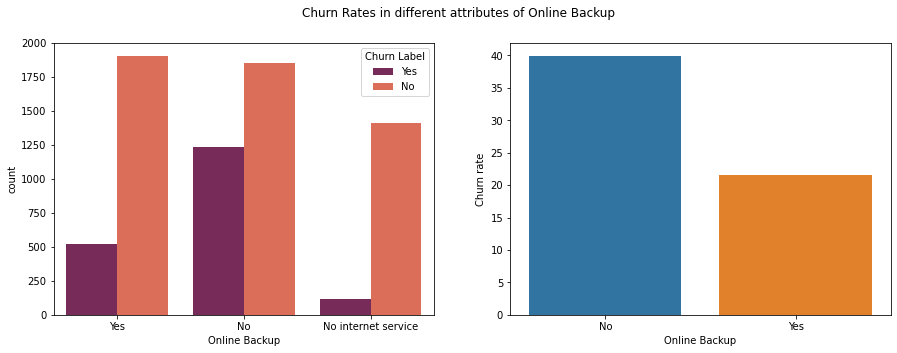

In [152]:
twoplots('Online Backup', gg8)

**Device Protection**<a id='Device_Protection'></a>

In [153]:
df['Device Protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64

In [154]:
ct9 = pd.crosstab(df['Device Protection'], df['Churn Label'])
print(ct9)

data = [['No', (ct9.iloc[0,1]/(ct9.iloc[0,0] + ct9.iloc[0,1])) * 100],
       ['Yes', (ct9.iloc[2,1]/(ct9.iloc[2,0] + ct9.iloc[2,1])) * 100]]
gg9 = pd.DataFrame(data, columns = ['Device Protection', 'Churn rate'])


Churn Label            No   Yes
Device Protection              
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


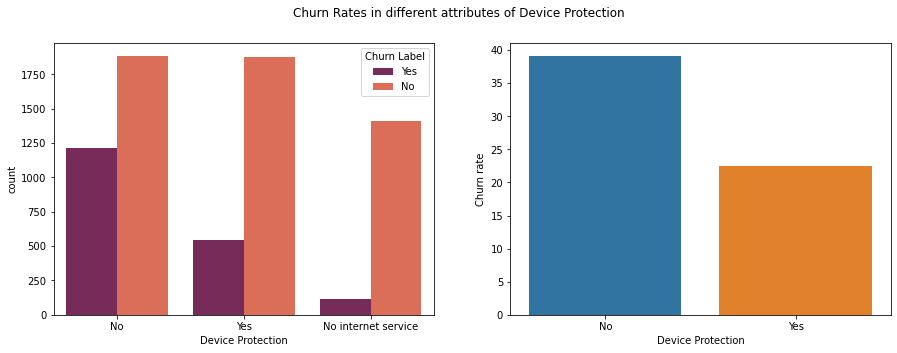

In [155]:
twoplots('Device Protection', gg9)

**Tech Support**<a id='Tech_Support'></a>

In [156]:
df['Tech Support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [157]:
ct10 = pd.crosstab(df['Tech Support'], df['Churn Label'])
print(ct10)

data = [['No', (ct10.iloc[0,1]/(ct10.iloc[0,0] + ct10.iloc[0,1])) * 100],
       ['Yes', (ct10.iloc[2,1]/(ct10.iloc[2,0] + ct10.iloc[2,1])) * 100]]
gg10 = pd.DataFrame(data, columns = ['Tech Support', 'Churn rate'])


Churn Label            No   Yes
Tech Support                   
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


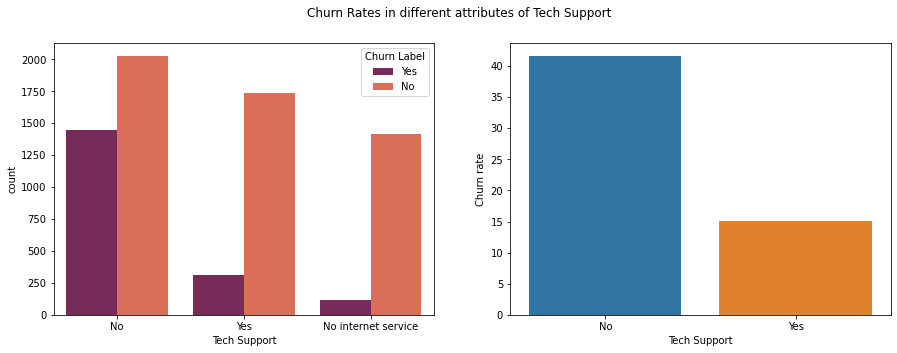

In [158]:
twoplots('Tech Support', gg10)

<font color='green'>Customers without online security, online backup, device protection and tech support seem to churn higher than 
that of those who have. these feautures can be predictors of churning.

**Streaming TV**<a id='Streaming_TV'></a>

In [159]:
df['Streaming TV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64

In [160]:
ct11 = pd.crosstab(df['Streaming TV'], df['Churn Label'])
print(ct11)

data = [['No', (ct11.iloc[0,1]/(ct11.iloc[0,0] + ct11.iloc[0,1])) * 100],
       ['Yes', (ct11.iloc[2,1]/(ct11.iloc[2,0] + ct11.iloc[2,1])) * 100]]
gg11 = pd.DataFrame(data, columns = ['Streaming TV', 'Churn rate'])


Churn Label            No  Yes
Streaming TV                  
No                   1868  942
No internet service  1413  113
Yes                  1893  814


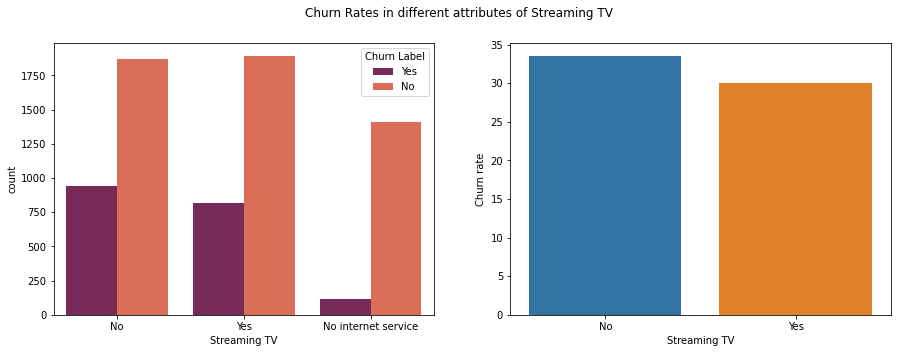

In [161]:
twoplots('Streaming TV', gg11)

**Streaming Movies**<a id='Streaming_Movies'></a>

In [162]:
df['Streaming Movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64

In [163]:
ct12 = pd.crosstab(df['Streaming Movies'], df['Churn Label'])
print(ct12)

data = [['No', (ct12.iloc[0,1]/(ct12.iloc[0,0] + ct12.iloc[0,1])) * 100],
       ['Yes', (ct12.iloc[2,1]/(ct12.iloc[2,0] + ct12.iloc[2,1])) * 100]]
gg12 = pd.DataFrame(data, columns = ['Streaming Movies', 'Churn rate'])


Churn Label            No  Yes
Streaming Movies              
No                   1847  938
No internet service  1413  113
Yes                  1914  818


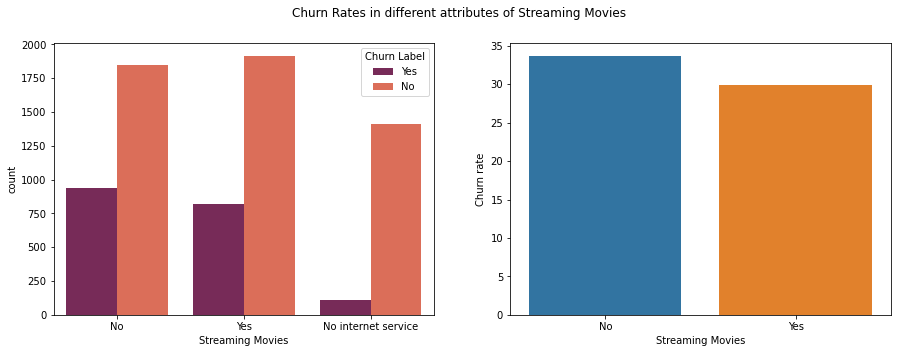

In [164]:
twoplots('Streaming Movies', gg12)

<font color='green'>Having services like streaming movies and streaming TV are not related that much to churn.

**Paperless Billing**<a id='Paperless_Billing'></a>

In [165]:
df_group = df.groupby('City').agg({'Churn Value': ['sum', 'count']})

In [166]:
df_group.columns = df_group.columns.droplevel()

In [167]:
df_group.columns

Index(['sum', 'count'], dtype='object')

In [168]:
churn_rate = (df_group['sum']/df_group['count'])*100

In [169]:
df_group['churn_rate'] = churn_rate

In [170]:
df_group['churn_rate'].describe()

count    1129.000000
mean       26.346558
std        21.663294
min         0.000000
25%         0.000000
50%        25.000000
75%        40.000000
max       100.000000
Name: churn_rate, dtype: float64

In [171]:
excelfile = df_group.to_excel('C:/Users/tnsub/Google Drive/SPRINGBOARD DSC/CustomerChurn_Project/csvfile.xlsx')

In [172]:
df['Paperless Billing'].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

In [173]:
ct13 = pd.crosstab(df['Paperless Billing'], df['Churn Label'])
print(ct13)

data = [['No', (ct13.iloc[0,1]/(ct13.iloc[0,0] + ct13.iloc[0,1])) * 100],
       ['Yes', (ct13.iloc[1,1]/(ct13.iloc[1,0] + ct13.iloc[1,1])) * 100]]
gg13 = pd.DataFrame(data, columns = ['Paperless Billing', 'Churn rate'])


Churn Label          No   Yes
Paperless Billing            
No                 2403   469
Yes                2771  1400


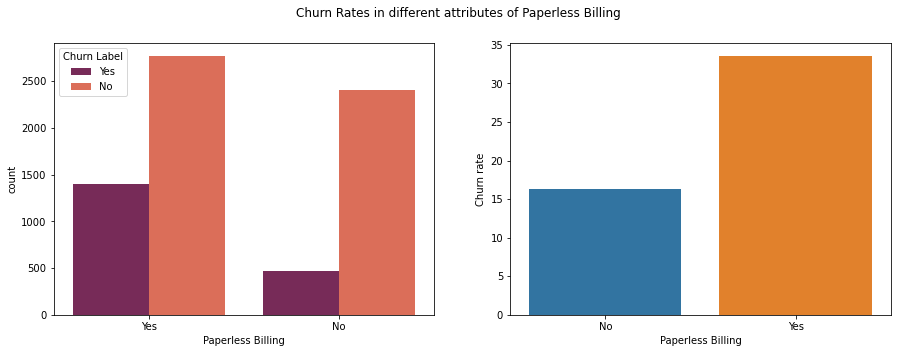

In [174]:
twoplots('Paperless Billing', gg13)

<font color='green'>Paperless billing option leads customers to churn more than those with paper bills.

**Payment Method**<a id='Payment_Method'></a>

In [175]:
df['Payment Method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

In [176]:
ct14 = pd.crosstab(df['Payment Method'], df['Churn Label'])
print(ct14)

data = [['Bank transfer', (ct14.iloc[0,1]/(ct14.iloc[0,0] + ct14.iloc[0,1])) * 100],
       ['Credit Card', (ct14.iloc[1,1]/(ct14.iloc[1,0] + ct14.iloc[1,1])) * 100],
       ['Electronic check',(ct14.iloc[2,1]/(ct14.iloc[2,0] + ct14.iloc[2,1])) *100],
       ['Mailed check', (ct14.iloc[3,1]/(ct14.iloc[3,0] + ct14.iloc[3,1])) * 100]]
gg14 = pd.DataFrame(data, columns = ['Payment Method', 'Churn rate'])

Churn Label                  No   Yes
Payment Method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


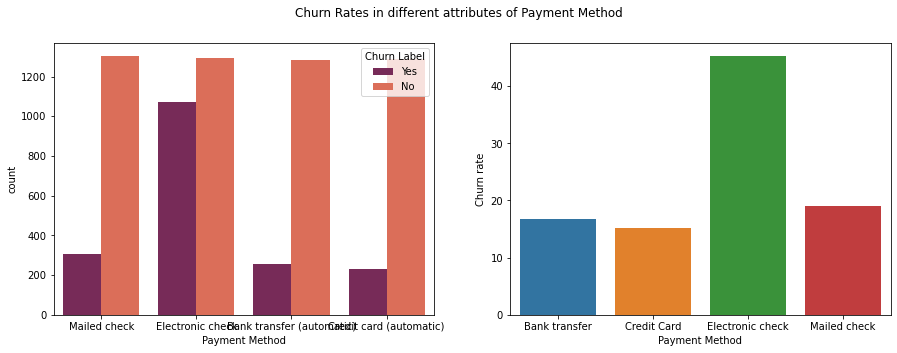

In [177]:
twoplots('Payment Method', gg14)

<font color='green'>Of the sample those who pay with electronic check churn much higher than that of those with other payment options.

**Tenure Months**<a id='Tenure_Months'></a>

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64


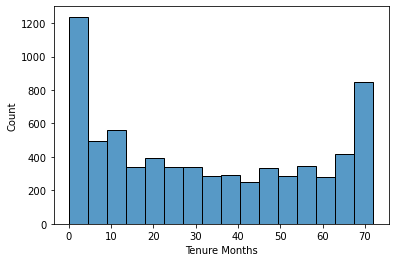

In [178]:
# Tenure is the amount of time the customer has contract with the company, measured in months
print(df['Tenure Months'].describe())
#Histogram to show distribution of values
sns.histplot(df['Tenure Months'])
plt.show()


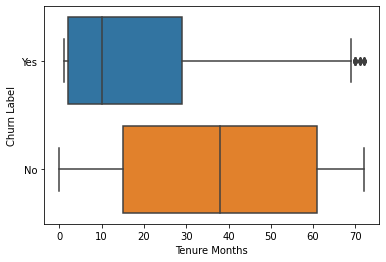

In [179]:
sns.boxplot(x='Tenure Months', y='Churn Label', data=df)
plt.show()

In [186]:
df.groupby('Churn Label').agg({'Tenure Months': ['mean', 'median', 'min', 'max']})

Tenure Months               
                     mean median min max
Churn Label                             
No              37.569965     38   0  72
Yes             17.979133     10   1  72

<font color='green'>The above table shows that those who churn on average have less number of tenure months compared to those
didn't churn.

**Charges**<a id='Charges'></a>\
The data has 2 different charges, monthly charges and total charges, it's not very clear if the monthly charges is the average charges or the charges for the last month. So I also calculated average charges by dividing total charges by the number of months which is the tenure. It turns out that the average charges I calculated is very close to the values of monthly charges in the data, although there's discrepancies of few dollars. I decided to use the average charges I calculated as it is more reflective of the total charges and tenure.
Following will focus on examining monthly charges, total charges and calculating average charges.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64


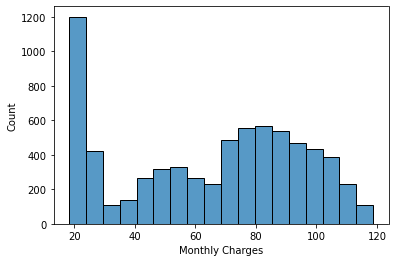

In [51]:
# MONTHLY CHARGES
print(df['Monthly Charges'].describe())
sns.histplot(df['Monthly Charges'])
plt.show()


From the histplot we can say that around 17% have monthly charges in the range between 20-30 dollars, the max is around 120 dollars and the mean charges are around $65.

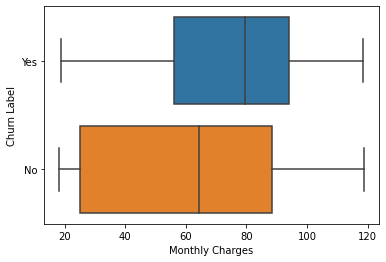

In [52]:
sns.boxplot(x='Monthly Charges', y='Churn Label', data=df)
plt.show()

seems like those with higher monthly charges are more likely to churn.

In [191]:
# TOTAL CHARGES
#For 11 rows the total charges were missing. After determinging that the tenure = 0 for them, the total charges for those rows were made equal to the monthly charges.
# first they were made NaNs and then those values were imputed with the monthly charges.
# this column was also made into numeric.
df['Total Charges'] = df['Total Charges'].replace(' ', np.NaN)

In [192]:
df['Total Charges'] = df['Total Charges'].fillna(df['Monthly Charges'])

In [193]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [194]:
df['Total Charges'].describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

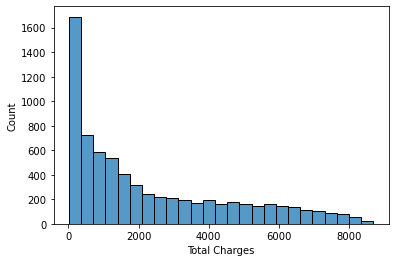

In [195]:
sns.histplot(df['Total Charges'])
plt.show()

In [197]:
# Calculating Average Monthly Charges
df['Average Monthly Charges'] = df['Total Charges']/df['Tenure Months']

In [198]:
#For tenure = 0, rows the monthly charges turned out to be infinite values. So this had to be corrected
df.loc[df['Tenure Months']==0]

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Average Monthly Charges
2234,4472-LVYGI,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No,0,36,2578,NaN,inf
2438,3115-CZMZD,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No,0,68,5504,NaN,inf
2568,5709-LVOEQ,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No,0,45,2048,NaN,inf
2667,4367-NUYAO,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No,0,48,4950,NaN,inf
2856,1371-DWPAZ,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No,0,30,4740,NaN,inf
4331,7644-OMVMY,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No,0,53,2019,NaN,inf
4687,3213-VVOLG,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No,0,49,2299,NaN,inf
5104,2520-SGTTA,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No,0,27,3763,NaN,inf
5719,2923-ARZLG,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No,0,69,4890,NaN,inf
6772,4075-WKNIU,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No,0,44,2342,NaN,inf


In [199]:
# These infinite values were replaced with NaNs and then they were imputed with respective monthly charges in 3 lines of code.
df['Average Monthly Charges'] = df['Average Monthly Charges'].replace([np.inf,-np.inf], np.NaN)

In [200]:
df['Average Monthly Charges'].isnull().value_counts()

False    7032
True       11
Name: Average Monthly Charges, dtype: int64

In [201]:
df['Average Monthly Charges'] = df['Average Monthly Charges'].fillna(df['Monthly Charges'])

In [202]:
df['Average Monthly Charges'].describe()

count    7043.000000
mean       64.762906
std        30.189796
min        13.775000
25%        35.935156
50%        70.337500
75%        90.174158
max       121.400000
Name: Average Monthly Charges, dtype: float64

In [203]:
df.groupby('Churn Label').agg({'Average Monthly Charges': ['mean', 'min', 'median']})

Average Monthly Charges                   
                               mean     min     median
Churn Label                                           
No                        61.269730  13.775  63.978909
Yes                       74.433154  14.150  79.312500

<font color='green'>Average monthly charges was $13 higher in churn customers. Median was also higher.

In [67]:
df['Total Charges'].corr(df['Tenure Months'])

0.8261642132367971

In [189]:
df['diff'] = abs(df['Monthly Charges'] - df['Average Monthly Charges'])

In [194]:
df['diff'].head()

0    0.000000
1    1.376471
2    0.225000
3    1.394444
4    5.125000
Name: diff, dtype: float64

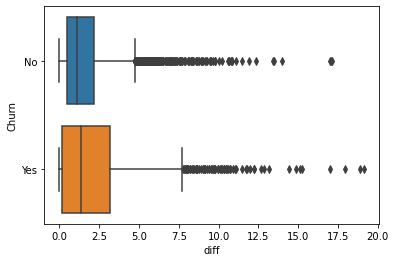

In [195]:
sns.boxplot(x='diff', y='Churn', data=df)
plt.show()

<font color='green'>the difference between average monthly charges calculated and the monthly charges provided in the dataset was calculated. The above boxplot
showed that this distribution or variation in this difference is higher in churn customers.

**Showing Churn rates in Different Cities using Tableau**<a id='Showing_Churn_rates_in_Different_Cities_using_Tableau'></a>\
In order to find churn rates, total number of churns was divided by the total number of customers in a city.

In [207]:
# finding total number of churns and total number of customers in a city
df_group = df.groupby('City').agg({'Churn Value': ['sum', 'count']})

In [208]:
# multiple levals of columns were created, so first level was dropped
df_group.columns = df_group.columns.droplevel()

In [209]:
df_group.columns

Index(['sum', 'count'], dtype='object')

In [210]:
#calculating churn rates
churn_rate = (df_group['sum']/df_group['count'])*100

In [211]:
# assigning churn rate as a column.
df_group['churn_rate'] = churn_rate

In [212]:
df_group['churn_rate'].describe()

count    1129.000000
mean       26.346558
std        21.663294
min         0.000000
25%         0.000000
50%        25.000000
75%        40.000000
max       100.000000
Name: churn_rate, dtype: float64

In [213]:
# saving dataframe as an excel file to do visualization in Tableau
excelfile = df_group.to_excel('C:/Users/tnsub/Google Drive/SPRINGBOARD DSC/CustomerChurn_Project/csvfile.xlsx')

**Link to Tableau public link**\
[churnrates in cities of CA](https://public.tableau.com/app/profile/b1453/viz/TelecomChurnratesinCitiesofCalifornia/Sheet1)

**Exploring Reasons for Churning**<a id='Exploring_Reasons_for_Churning'></a>\
Barchart below shows the reasons for churning. 'Attitude of support' and 'competitor offered higher speed' top the list with high number of customers' churning.

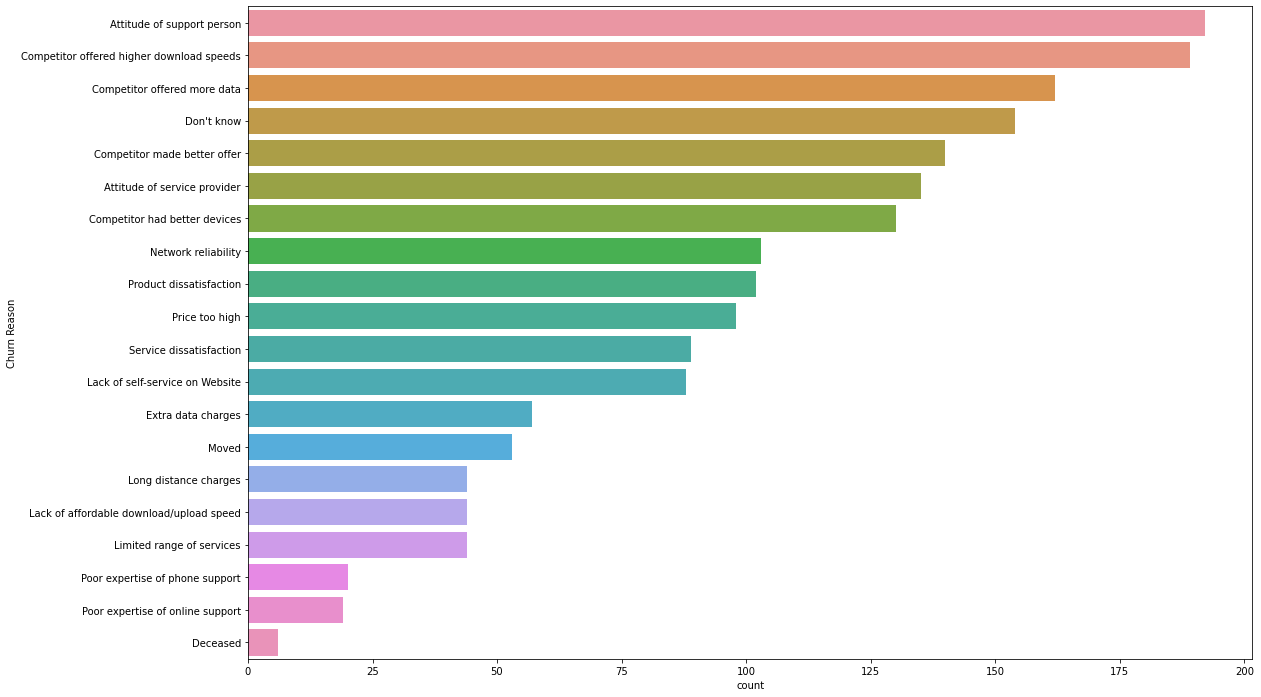

In [214]:
plt.figure(figsize=(18,12))
sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
plt.show()

**CLTV (Customer Lifetime Value)<a id='Customer_Lifetime_Value'></a>**\
CLTV is the total value that a customer will bring to the company after deducting all the costs of servicing the customer.

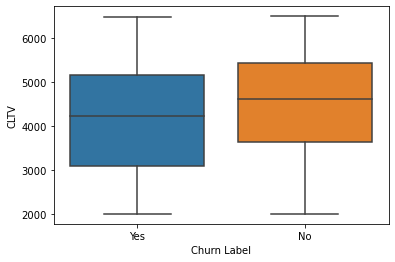

In [109]:
sns.boxplot(y='CLTV', x='Churn Label', data=df)
plt.show()

In [216]:
df.groupby('Churn Label').agg({'CLTV': ['mean', 'min', 'median']})

CLTV             
                    mean   min median
Churn Label                          
No           4490.921337  2003   4620
Yes          4149.414660  2003   4238

<font color='green'>There's around $340 difference in mean of customer lifetime value between the churn and not churn customers.

In [218]:
# Saving dataframe for preprocessing
cc_1 = df.to_csv(r'C:\Users\tnsub\Google Drive\SPRINGBOARD DSC\CustomerChurn_Project\cc_1.csv')